In [2]:
import tensorflow

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

1.12.0


In [77]:
import tensorflow.keras as keras

In [221]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [222]:
print(x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

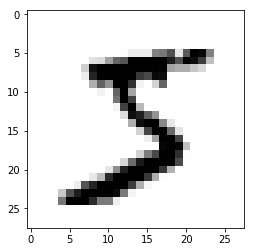

In [223]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [51]:
print(y_train[0])

5


In [224]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

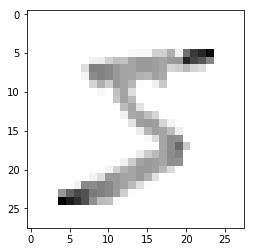

In [225]:

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [227]:
model = tf.keras.models.Sequential()


In [229]:
model.add(tf.keras.layers.Flatten(input_shape =x_train[0].shape))


In [56]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))


In [57]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))


In [58]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 7s 116us/step - loss: 0.2627 - acc: 0.9226
Epoch 2/3
60000/60000 [==============================] - 7s 110us/step - loss: 0.1089 - acc: 0.9660
Epoch 3/3
60000/60000 [==============================] - 7s 111us/step - loss: 0.0728 - acc: 0.9773


In [61]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)


10000/10000 [==============================] - 1s 51us/step
0.10145093928361311
0.9703


In [62]:
model.save('epic_num_reader.model')


In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')


In [232]:
predictions = new_model.predict(x_test)
print(predictions)

[[5.5261542e-09 6.0507186e-09 2.8798888e-06 ... 9.9998975e-01
  1.9994451e-09 4.7623736e-08]
 [8.6443343e-08 1.4436922e-04 9.9967027e-01 ... 9.8125452e-10
  2.2217295e-09 1.3163021e-11]
 [3.3675224e-08 9.9975342e-01 1.4129841e-05 ... 8.4278763e-05
  1.1690786e-04 1.0833264e-06]
 ...
 [2.0849319e-08 1.6250317e-05 7.6921805e-07 ... 1.0395587e-04
  3.9802953e-06 1.0337284e-03]
 [8.5093490e-08 2.4351346e-08 4.4837338e-07 ... 2.0435841e-08
  8.2976701e-05 2.1397040e-10]
 [2.2900194e-06 6.9981519e-07 4.5340411e-07 ... 2.3622040e-09
  6.1909759e-08 1.5651208e-08]]


In [66]:
import numpy as np
i=0
for x in range(len(predictions)+1):
    print(np.argmax(predictions[i]))
    i=i+1

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
2
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
5
8
7
2
3
0
2
4
2
4
1
9
5
7
7
2
8
2
6
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
9
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
3
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
7
3
7
6
1
6
2
1
9
2
2
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
3
9
2
0
2
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
6
6
4
9
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
0
9
4
0
6


3
2
5
9
0
8
8
4
0
8
8
4
5
4
8
5
4
9
2
2
1
2
6
8
8
7
0
3
6
6
4
3
8
8
7
2
2
0
0
9
3
9
9
1
9
8
6
6
4
2
6
9
2
8
5
4
5
7
9
9
9
2
1
8
3
4
0
7
8
3
9
3
4
6
5
6
2
3
9
2
6
0
0
6
1
2
8
7
9
8
2
0
4
7
7
5
0
5
6
4
6
7
4
3
0
7
5
0
7
4
2
0
8
9
9
4
2
4
6
7
8
8
6
9
4
1
3
7
3
0
8
7
7
6
1
3
9
2
2
9
2
1
8
3
2
9
6
8
4
0
1
2
8
4
5
7
7
8
1
1
3
0
3
5
7
0
3
1
9
3
5
3
1
7
7
3
0
8
4
8
2
6
5
2
9
7
3
9
0
9
9
6
4
2
9
7
2
1
1
6
7
4
7
5
9
6
8
2
1
4
4
5
7
6
1
3
2
5
9
9
3
6
1
1
4
6
9
7
2
1
5
1
4
6
3
4
1
1
0
3
1
6
8
4
9
0
7
3
0
2
9
0
6
6
6
3
6
7
7
2
8
6
0
8
3
0
2
9
8
3
2
5
3
8
8
0
0
1
9
5
1
3
9
6
0
1
4
1
7
1
2
3
7
9
7
4
9
9
3
9
2
8
2
7
1
8
0
9
1
0
1
7
7
9
6
9
9
9
2
1
6
1
3
5
7
1
9
7
6
4
5
7
6
1
9
9
6
3
6
2
9
8
1
2
2
5
5
2
3
7
2
1
0
1
0
4
5
2
0
2
8
3
5
1
7
3
1
1
2
9
7
8
4
0
3
0
7
8
8
4
7
7
8
5
8
4
9
8
1
3
8
0
3
1
7
9
5
5
1
6
5
7
4
9
3
5
4
7
1
2
0
8
1
6
0
7
3
4
7
3
9
6
0
8
6
4
8
7
7
9
3
8
6
9
7
2
3
4
0
2
1
3
5
5
5
7
2
4
0
7
2
8
3
0
8
7
8
4
0
8
4
4
5
8
5
6
6
3
0
9
3
7
6
8
9
3
4
9
5
8
9
1
2
8
8
6
8
1
3
7
9
0
1
1
9
7
0
8
1
7


3
0
8
3
0
6
2
7
8
1
7
1
3
8
5
4
2
0
9
7
6
7
4
1
6
2
6
7
1
9
8
0
6
9
4
9
9
6
2
3
7
1
9
2
2
5
3
7
8
0
1
2
3
4
7
8
9
0
1
2
3
4
7
8
9
0
1
7
8
9
8
9
2
6
1
3
5
4
8
2
6
4
3
4
5
9
2
0
3
9
4
9
7
3
8
7
4
4
9
8
5
8
2
6
6
2
3
1
3
2
7
3
1
9
0
1
1
3
5
0
7
8
1
5
1
4
6
0
0
4
9
1
6
6
9
0
7
6
1
1
0
1
2
3
4
2
2
3
4
5
6
2
0
1
2
2
8
6
3
9
2
1
9
3
9
6
1
7
2
4
4
5
7
0
0
1
6
6
8
2
7
7
2
4
2
1
6
1
0
6
9
8
3
9
6
3
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
1
6
8
9
9
0
1
2
4
4
3
7
4
4
4
0
3
8
7
5
8
2
1
7
5
3
8
5
2
5
1
1
6
2
1
3
8
6
7
2
6
2
5
5
0
2
8
0
6
8
1
7
9
1
9
2
6
7
6
6
8
7
4
9
2
1
3
3
0
5
5
8
0
3
7
9
7
0
2
7
9
1
7
8
0
3
5
3
6
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
7
8
9
6
4
2
6
9
7
8
9
2
9
3
9
3
0
0
1
0
4
2
6
3
5
3
0
3
4
1
5
3
0
8
3
0
6
1
7
8
0
9
2
6
7
1
9
6
9
4
9
9
6
7
1
2
5
3
7
8
0
1
2
4
5
6
7
8
9
0
1
3
4
5
6
7
5
0
1
3
4
7
8
9
7
5
5
1
9
9
7
1
0
0
5
9
7
1
7
2
2
3
6
8
3
2
0
0
6
1
7
5
8
6
2
9
4
8
8
7
1
0
8
7
7
5
8
5
3
4
6
1
1
5
5
0
7
2
3
6
4
1
2
4
1
5
4
2
0
4
8
6
1
9
0
2
5
6
9
3


IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [4]:
pwd

'C:\\Users\\tvaru\\Desktop\\Train-2019\\Train'

In [7]:
lll

['ammania basifera',
 'Blast',
 'BLB',
 'BPH',
 'Cyperus diformis',
 'Echinochloa crusgalli',
 'Eclipta alba',
 'False smut',
 'Gall midge',
 'Healthy',
 'Hispa',
 'Leaf folder',
 'Marselia quadrifoliata',
 'RTD',
 'SHBL',
 'Yellow stem borer']

In [6]:
lll=[]
import os
for d in os.listdir():
    
   lll.append(d)

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
def funn():
    datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

    img = load_img(r'C:\Users\Check Augmentation\check.png')  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=r'C:\Users\tvaru\Desktop\cc', save_prefix='cat', save_format='png'):
        i += 1
        if i > 20:
            break 
funn()

In [1]:
import tensorflow.keras

Dog


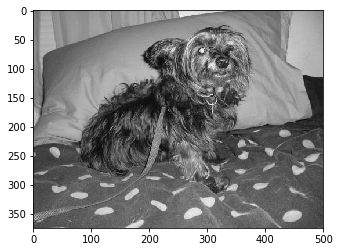

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\tvaru\Desktop\cc\PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    print(category)
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [23]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


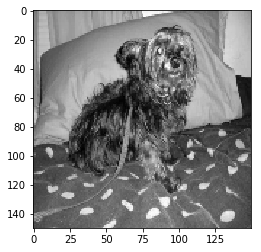

In [24]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #print(new_array)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

In [94]:
import random

random.shuffle(training_data)

In [95]:
for sample in training_data[:15]:
    print(sample[1])

0
0
1
1
0
1
0
1
1
1
0
1
1
1
0


In [96]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[205]
   [205]
   [206]
   ...
   [ 65]
   [ 65]
   [ 65]]

  [[205]
   [205]
   [206]
   ...
   [ 65]
   [ 65]
   [ 65]]

  [[205]
   [205]
   [206]
   ...
   [ 65]
   [ 65]
   [ 65]]

  ...

  [[ 53]
   [ 59]
   [ 71]
   ...
   [164]
   [164]
   [164]]

  [[ 52]
   [ 50]
   [ 65]
   ...
   [166]
   [159]
   [158]]

  [[ 52]
   [ 54]
   [ 61]
   ...
   [159]
   [156]
   [161]]]]


In [97]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [98]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [99]:
X

array([[[[205],
         [205],
         [206],
         ...,
         [ 65],
         [ 65],
         [ 65]],

        [[205],
         [205],
         [206],
         ...,
         [ 65],
         [ 65],
         [ 65]],

        [[205],
         [205],
         [206],
         ...,
         [ 65],
         [ 65],
         [ 65]],

        ...,

        [[ 53],
         [ 59],
         [ 71],
         ...,
         [164],
         [164],
         [164]],

        [[ 52],
         [ 50],
         [ 65],
         ...,
         [166],
         [159],
         [158]],

        [[ 52],
         [ 54],
         [ 61],
         ...,
         [159],
         [156],
         [161]]],


       [[[101],
         [100],
         [ 99],
         ...,
         [  4],
         [  4],
         [  2]],

        [[100],
         [100],
         [100],
         ...,
         [  2],
         [  3],
         [  2]],

        [[100],
         [100],
         [102],
         ...,
         [  3],
         [

In [100]:
y

[0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,


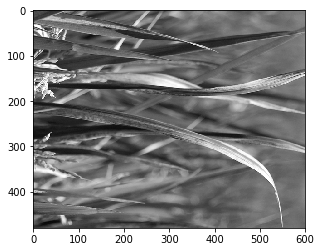

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\tvaru\Desktop\disease blight"

CATEGORIES = ["disease blight"]

for category in CATEGORIES:
    #print(category)# do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [87]:
print(new_array.shape)

(50, 50)


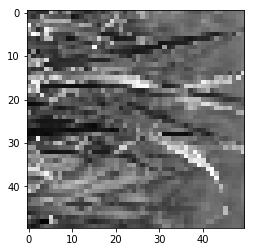

In [85]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [88]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=disease blight
        print(path)
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                #print(img)
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                print(img_array)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #print(new_array)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


C:\Users\tvaru\Desktop\disease blight\disease blight



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

[[103  97  95 ... 131 127 129]
 [ 85  78  72 ... 130 130 130]
 [ 68  81  93 ... 129 129 133]
 ...
 [ 60  58  58 ... 108 108 108]
 [ 61  60  60 ... 109 108 108]
 [ 70  69  69 ... 109 108 107]]
[[ 35  24 110 ...  28  16 119]
 [  0   0 111 ...  10   0 103]
 [  4   5 128 ...   8   0 101]
 ...
 [  1   5  61 ...   1   1 103]
 [  1   5  61 ...   1   1 103]
 [  1   5  61 ...   1   1 103]]



 25%|█████████████████████                                                               | 2/8 [00:00<00:00, 16.49it/s]

[[ 68  84 109 ... 110 109 108]
 [ 56  69  89 ... 120 120 119]
 [ 49  56  68 ... 131 130 130]
 ...
 [ 11  11  12 ... 109 113 120]
 [ 11  11  12 ... 108 112 120]
 [ 11  11  12 ... 107 110 120]]



 38%|███████████████████████████████▌                                                    | 3/8 [00:00<00:00, 12.37it/s]

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 81  81  81 ...  37  53  66]
 [ 84  82  79 ...  57  57  58]
 [129 127 124 ... 109 109 110]]
[[ 44  65  92 ...  56  98 126]
 [ 44  56  78 ...  66 105 132]
 [ 44  46  59 ...  79 114 139]
 ...
 [ 35  31  32 ... 220 208 182]
 [ 35  31  31 ... 214 202 175]
 [ 35  30  31 ... 207 195 167]]



 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 12.65it/s]

[[136 136 136 ... 129 129 129]
 [136 136 136 ... 129 129 129]
 [136 136 136 ... 129 129 129]
 ...
 [127 128 130 ... 109 109 109]
 [128 129 131 ... 107 108 108]
 [129 130 131 ... 107 107 107]]
[[ 80  81 117 ...  75  73 151]
 [  8  38 110 ...   0   0  72]
 [  0  39 115 ...   4   2  80]
 ...
 [  0  32 109 ...   3   1  79]
 [  0  32 109 ...   3   1  79]
 [ 34  49 122 ...  30  26 100]]



 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:00<00:00, 13.68it/s]

[[135 139 146 ... 141 145 148]
 [138 142 148 ... 137 141 144]
 [132 136 141 ... 129 132 135]
 ...
 [ 23  22  21 ...  92 104 105]
 [ 23  23  21 ...  92 104 105]
 [ 24  23  22 ...  92 104 105]]



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 14.29it/s]

8


In [89]:
import random

random.shuffle(training_data)

In [90]:
training_data

[[array([[ 85,  82,  65, ..., 126, 127, 131],
         [ 81,  65,  84, ..., 125, 134, 137],
         [107, 116, 117, ..., 117, 129, 137],
         ...,
         [140,  93,  78, ..., 115, 113, 111],
         [ 88,  66,  48, ..., 118, 116, 109],
         [ 53,  38,  53, ..., 119, 118, 110]], dtype=uint8), 0],
 [array([[136, 133, 133, ..., 125, 128, 129],
         [136, 134, 134, ..., 123, 127, 129],
         [135, 134, 138, ..., 124, 127, 128],
         ...,
         [125, 137, 140, ..., 104, 113, 118],
         [127, 141, 139, ..., 103, 107, 113],
         [132, 145, 144, ...,  97, 101, 107]], dtype=uint8), 0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [ 60, 113, 128, ...,  81,  40,  58],
         [ 80,  60, 117, ...,  88,  63,  44],
         [ 80,  72, 104, ..., 139,  89,  50]], dtype=uint8), 0],
 [array([[ 57, 157, 107, ...,  16,   5,  89],
         [ 63,  75, 132, ..

In [91]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 85]
   [ 82]
   [ 65]
   ...
   [126]
   [127]
   [131]]

  [[ 81]
   [ 65]
   [ 84]
   ...
   [125]
   [134]
   [137]]

  [[107]
   [116]
   [117]
   ...
   [117]
   [129]
   [137]]

  ...

  [[140]
   [ 93]
   [ 78]
   ...
   [115]
   [113]
   [111]]

  [[ 88]
   [ 66]
   [ 48]
   ...
   [118]
   [116]
   [109]]

  [[ 53]
   [ 38]
   [ 53]
   ...
   [119]
   [118]
   [110]]]]


In [92]:
y

[0, 0, 0, 0, 0, 0, 0, 0]

In [93]:
X

array([[[[ 85],
         [ 82],
         [ 65],
         ...,
         [126],
         [127],
         [131]],

        [[ 81],
         [ 65],
         [ 84],
         ...,
         [125],
         [134],
         [137]],

        [[107],
         [116],
         [117],
         ...,
         [117],
         [129],
         [137]],

        ...,

        [[140],
         [ 93],
         [ 78],
         ...,
         [115],
         [113],
         [111]],

        [[ 88],
         [ 66],
         [ 48],
         ...,
         [118],
         [116],
         [109]],

        [[ 53],
         [ 38],
         [ 53],
         ...,
         [119],
         [118],
         [110]]],


       [[[136],
         [133],
         [133],
         ...,
         [125],
         [128],
         [129]],

        [[136],
         [134],
         [134],
         ...,
         [123],
         [127],
         [129]],

        [[135],
         [134],
         [138],
         ...,
         [124],
         [

In [94]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [95]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=1, epochs=3, validation_split=0.3)

Train on 5 samples, validate on 3 samples
Epoch 1/3
5/5 [==============================] - ETA: 45s - loss: 0.6759 - acc: 1.00 - ETA: 17s - loss: 0.3380 - acc: 1.00 - ETA: 7s - loss: 0.2254 - acc: 1.0000 - ETA: 2s - loss: 0.1690 - acc: 1.000 - 12s 2s/step - loss: 0.1352 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/3
5/5 [==============================] - ETA: 0s - loss: 1.0000e-07 - acc: 1.000 - ETA: 0s - loss: 1.0000e-07 - acc: 1.000 - ETA: 0s - loss: 1.0000e-07 - acc: 1.000 - ETA: 0s - loss: 1.0000e-07 - acc: 1.000 - 1s 134ms/step - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 3/3
5/5 [==============================] - ETA: 0s - loss: 1.0000e-07 - acc: 1.000 - ETA: 0s - loss: 1.0000e-07 - acc: 1.000 - ETA: 0s - loss: 1.0000e-07 - acc: 1.000 - ETA: 0s - loss: 1.0000e-07 - acc: 1.000 - 1s 145ms/step - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000


In [105]:
import cv2
import tensorflow as tf
CATEGORIES = ["disease blight"]  # will use this to convert prediction num to string value
def prepare(filepath):
    IMG_SIZE = 70  # 50 in txt-based
    print(filepath)
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    # read in the image, convert to grayscale
    print(img_array)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [106]:
model = tf.keras.models.load_model("CNN.model")


In [107]:
prediction = model.predict([prepare(r'C:\Users\tvaru\Desktop\test1.jpg')])

C:\Users\tvaru\Desktop\test1.jpg
None


error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [70]:
IMG_SIZE

150

In [100]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Rice-blight"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(16))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=1,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])


Train on 5 samples, validate on 3 samples
Epoch 1/3
5/5 [==============================] - ETA: 0s - loss: 0.2529 - acc: 1.000 - ETA: 0s - loss: 0.1913 - acc: 1.000 - 2s 356ms/step - loss: 0.1535 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 2/3
5/5 [==============================] - ETA: 0s - loss: 9.1130e-04 - acc: 1.000 - ETA: 0s - loss: 6.3199e-04 - acc: 1.000 - ETA: 0s - loss: 4.8314e-04 - acc: 1.000 - 0s 99ms/step - loss: 3.9115e-04 - acc: 1.0000 - val_loss: 3.3358e-05 - val_acc: 1.0000
Epoch 3/3
5/5 [==============================] - ETA: 0s - loss: 4.7455e-06 - acc: 1.000 - ETA: 0s - loss: 7.1513e-06 - acc: 1.000 - ETA: 0s - loss: 5.2448e-06 - acc: 1.000 - ETA: 0s - loss: 3.9784e-06 - acc: 1.000 - 0s 76ms/step - loss: 3.3383e-06 - acc: 1.0000 - val_loss: 1.9279e-06 - val_acc: 1.0000


In [103]:
from tensorflow import keras

In [104]:
keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, depth_multiplier=1, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)


TypeError: ('Invalid keyword argument: %s', 'depth_multiplier')

# Training mobilenetV2 

In [108]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [153]:
import numpy as np 
import tensorflow.keras
from tensorflow.keras import backend as K 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.MobileNet import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib. pyplot as plt 
%matplotlib inline

In [190]:
from keras_applications import imagenet_utils

In [191]:
mobile1=tensorflow.keras.applications.mobilenet.MobileNet()

In [128]:
from tensorflow.keras.applications import MobileNet

In [192]:
def prepare_image(file):
    img_path = r'C:\Users\tvaru\Desktop\disease blight\disease blight'
    img = image.load_img(img_path+file, target_size=(224,224))
    print(img_path+file)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array,axis=0) 
    return tensorflow.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

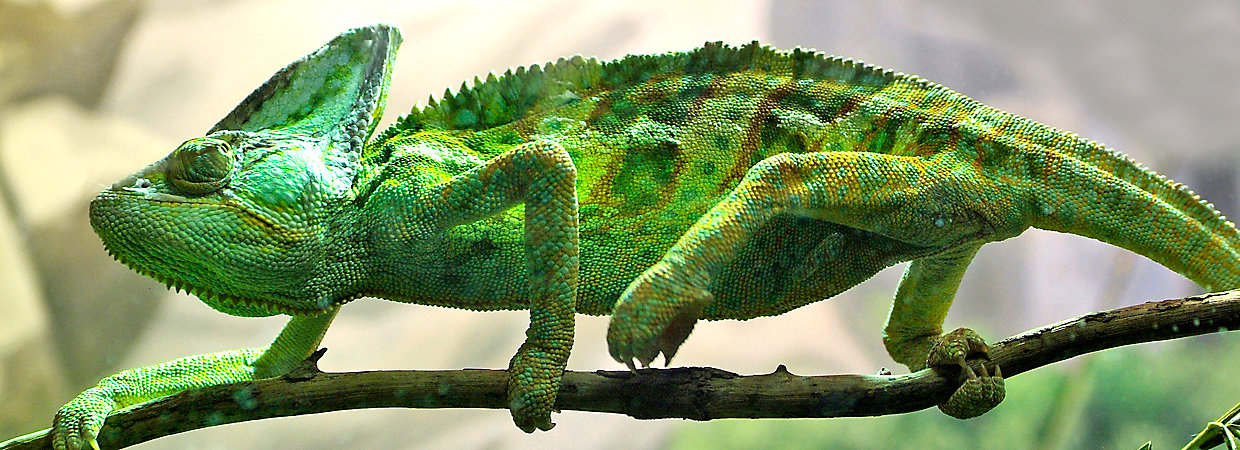

In [193]:
from IPython.display import Image
Image(filename=r'C:\Users\tvaru\Desktop\disease blight\disease blight\che.JPG',width=224,height=224)

In [194]:
preprocessed_image = prepare_image('\\che.JPG') 

predictions = mobile1.predict(preprocessed_image)
print(predictions)


C:\Users\tvaru\Desktop\disease blight\disease blight\che.JPG
[[6.21060092e-10 3.93040445e-09 4.27946567e-11 7.38384874e-12
  2.89705815e-10 5.61474978e-10 5.18295851e-10 2.97533820e-08
  3.11542148e-09 1.84842619e-09 8.77775506e-07 5.53405748e-08
  6.06092385e-07 3.56780561e-08 1.48679203e-06 7.58228413e-09
  8.89499461e-08 8.65748984e-09 1.57044919e-08 2.56708468e-08
  1.25456145e-09 2.16042739e-09 1.11755796e-08 1.40651224e-08
  3.90164834e-09 2.62442379e-09 1.84451181e-07 7.82318033e-09
  2.17691809e-10 2.08310791e-08 1.42819778e-09 4.28081961e-08
  3.32400667e-08 1.02120490e-09 3.68857811e-09 3.77973421e-08
  5.47158452e-09 9.60313571e-08 3.93444395e-07 9.43175866e-04
  7.37317969e-05 4.69582488e-08 4.93398784e-06 2.42296187e-06
  2.15183968e-06 2.45288305e-07 1.44826842e-03 9.96765852e-01
  3.05499213e-07 1.48301305e-09 8.33587350e-08 1.36796416e-05
  7.11606218e-10 6.11438400e-10 5.07752995e-09 6.49879257e-06
  1.69484871e-10 3.21714128e-10 5.18479815e-10 5.68659175e-07
  1.62095

  1.40825183e-08 2.16737046e-08 1.36654216e-06 1.83164695e-09]]


In [195]:
from tensorflow.keras.applications import MobileNetV2

In [196]:
results= decode_predictions(predictions)
results

[[('n01694178', 'African_chameleon', 0.99676585),
  ('n01693334', 'green_lizard', 0.0014482684),
  ('n01677366', 'common_iguana', 0.00094317587),
  ('n07716358', 'zucchini', 0.00048256028),
  ('n01682714', 'American_chameleon', 7.37318e-05)]]

In [163]:
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

In [171]:
tensorflow.keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)


In [213]:
mobile1.save(r'C:\Users\tvaru\Desktop\disease blight\Train\my_model.h5')

In [ ]:
mobile1.save('my_model.h5')

In [234]:

from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = mobile1.to_json()


with open(r'C:\Users\tvaru\Desktop\disease blight\Train\my_model.json', "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5


# Transfer learning 

In [330]:
mobile=keras.applications.mobilenet_v2.MobileNetV2(include_top=False,weights='imagenet')

C:\Users\tvaru\Anaconda2\lib\site-packages\keras_applications\mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


9412608/9406464 [==============================] - ETA: 6: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: -

In [341]:
train_path= r'C:\Users\tvaru\Desktop\disease blight\Train'
valid_path= r'C:\Users\tvaru\Desktop\disease blight\valid'
test_path= r'C:\Users\tvaru\Desktop\disease blight\Test'

In [342]:
train_batches= ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224),batch_size=1)
valid_batches= ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size=(224,224),batch_size=1)
test_batches= ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(224,224),batch_size=1,shuffle=False)

Found 1 images belonging to 1 classes.
Found 3 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


In [343]:
train_batches

In [333]:
mobile.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

__________________________________________________________________________________________________
block_8_project (Conv2D)        (None, None, None, 6 24576       block_8_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_8_project_BN (BatchNormal (None, None, None, 6 256         block_8_project[0][0]            
__________________________________________________________________________________________________
block_8_add (Add)               (None, None, None, 6 0           block_7_add[0][0]                
                                                                 block_8_project_BN[0][0]         
__________________________________________________________________________________________________
block_9_expand (Conv2D)         (None, None, None, 3 24576       block_8_add[0][0]                
__________________________________________________________________________________________________
block_9_ex

# modify the model

In [334]:
x=mobile.layers[-3].output
predictions=Dense(1,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=predictions)

In [335]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

__________________________________________________________________________________________________
block_8_project (Conv2D)        (None, None, None, 6 24576       block_8_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_8_project_BN (BatchNormal (None, None, None, 6 256         block_8_project[0][0]            
__________________________________________________________________________________________________
block_8_add (Add)               (None, None, None, 6 0           block_7_add[0][0]                
                                                                 block_8_project_BN[0][0]         
__________________________________________________________________________________________________
block_9_expand (Conv2D)         (None, None, None, 3 24576       block_8_add[0][0]                
__________________________________________________________________________________________________
block_9_ex

In [336]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [337]:
for layer in model.layers[:-2]:
    layer.trainable=False

In [338]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [339]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=2,epochs=30,verbose=2)

Epoch 1/30


ValueError: Error when checking target: expected dense_2 to have 4 dimensions, but got array with shape (1, 1)

 #  Predict

In [268]:
test_labels=test_batches.classes

In [269]:
test_labels

array([0])

In [271]:
test_batches.class_indices


{'leafblight': 0}

In [272]:
predictions=model.predict_generator(test_batches,steps=1,verbose=0)

In [273]:
predictions

array([[[[1.]]]], dtype=float32)

In [274]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [275]:
cm=confusion_matrix(test_labels,predictions.argmax(axis=1))

ValueError: Classification metrics can't handle a mix of binary and unknown targets

In [276]:
import sys
from tensorflow.contrib.lite import convert_savedmodel

ImportError: cannot import name 'convert_savedmodel'

In [285]:
from tensorflow.contrib.lite.python import convert_saved_model



In [284]:
from  tensorflow.contrib.lite.python import convert_saved_model


In [288]:
convert_saved_model.convert(saved_model_dir=r"C:\Users\tvaru\Desktop\my_model.h5",output_tfile=r"C:\Users\tvaru\Desktop\disease blight\TF_Lite_Model.tflite")


AttributeError: module 'tensorflow.contrib.lite.python.convert_saved_model' has no attribute 'convert'

In [289]:
from tensorflow.contrib import lite

In [290]:
converter=lite.TocoConverter.from_keras_model_file(r"C:\Users\tvaru\Desktop\my_model.h5")

Instructions for updating:
Use `lite.TFLiteConverter.from_keras_model_file` instead.


TypeError: '<' not supported between instances of 'dict' and 'float'

In [294]:
keras_model="my_model.h5"

In [295]:
converter = lite.TFLiteConverter.from_keras_model_file(keras_model)
tflite_model = converter.convert()


TypeError: '<' not supported between instances of 'dict' and 'float'

In [297]:
from tensorflow.contrib import lite

In [304]:
import tensorflow as tf
converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file(keras_file)


#converter = tf.lite.TFLiteConverter.from_keras_model_file("my_model.h5")
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Froze 4 variables.
INFO:tensorflow:Converted 4 variables to const ops.


RuntimeError: TOCO failed see console for info.
b'Traceback (most recent call last):\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\site-packages\\tensorflow\\contrib\\lite\\toco\\python\\tensorflow_wrap_toco.py", line 18, in swig_import_helper\r\n    fp, pathname, description = imp.find_module(\'_tensorflow_wrap_toco\', [dirname(__file__)])\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\imp.py", line 297, in find_module\r\n    raise ImportError(_ERR_MSG.format(name), name=name)\r\nImportError: No module named \'_tensorflow_wrap_toco\'\r\n\r\nDuring handling of the above exception, another exception occurred:\r\n\r\nTraceback (most recent call last):\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\runpy.py", line 193, in _run_module_as_main\r\n    "__main__", mod_spec)\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\runpy.py", line 85, in _run_code\r\n    exec(code, run_globals)\r\n  File "C:\\Users\\tvaru\\Anaconda2\\Scripts\\toco_from_protos.exe\\__main__.py", line 5, in <module>\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\site-packages\\tensorflow\\contrib\\lite\\toco\\python\\toco_from_protos.py", line 22, in <module>\r\n    from tensorflow.contrib.lite.toco.python import tensorflow_wrap_toco\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\site-packages\\tensorflow\\contrib\\lite\\toco\\python\\tensorflow_wrap_toco.py", line 28, in <module>\r\n    _tensorflow_wrap_toco = swig_import_helper()\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\site-packages\\tensorflow\\contrib\\lite\\toco\\python\\tensorflow_wrap_toco.py", line 20, in swig_import_helper\r\n    import _tensorflow_wrap_toco\r\nModuleNotFoundError: No module named \'_tensorflow_wrap_toco\'\r\n'
None


In [302]:
import numpy as np
import tensorflow as tf

# Generate tf.keras model.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(3,)))
model.add(tf.keras.layers.RepeatVector(3))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(3)))
model.compile(loss=tf.keras.losses.MSE,
              optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              metrics=[tf.keras.metrics.categorical_accuracy],
              sample_weight_mode='temporal')

x = np.random.random((1, 3))
y = np.random.random((1, 3, 3))
model.train_on_batch(x, y)
model.predict(x)

# Save tf.keras model in HDF5 format.
keras_file = "keras_model.h5"
tf.keras.models.save_model(model, keras_file)

# Convert to TensorFlow Lite model.
converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Froze 4 variables.
INFO:tensorflow:Converted 4 variables to const ops.


RuntimeError: TOCO failed see console for info.
b'Traceback (most recent call last):\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\site-packages\\tensorflow\\contrib\\lite\\toco\\python\\tensorflow_wrap_toco.py", line 18, in swig_import_helper\r\n    fp, pathname, description = imp.find_module(\'_tensorflow_wrap_toco\', [dirname(__file__)])\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\imp.py", line 297, in find_module\r\n    raise ImportError(_ERR_MSG.format(name), name=name)\r\nImportError: No module named \'_tensorflow_wrap_toco\'\r\n\r\nDuring handling of the above exception, another exception occurred:\r\n\r\nTraceback (most recent call last):\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\runpy.py", line 193, in _run_module_as_main\r\n    "__main__", mod_spec)\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\runpy.py", line 85, in _run_code\r\n    exec(code, run_globals)\r\n  File "C:\\Users\\tvaru\\Anaconda2\\Scripts\\toco_from_protos.exe\\__main__.py", line 5, in <module>\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\site-packages\\tensorflow\\contrib\\lite\\toco\\python\\toco_from_protos.py", line 22, in <module>\r\n    from tensorflow.contrib.lite.toco.python import tensorflow_wrap_toco\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\site-packages\\tensorflow\\contrib\\lite\\toco\\python\\tensorflow_wrap_toco.py", line 28, in <module>\r\n    _tensorflow_wrap_toco = swig_import_helper()\r\n  File "c:\\users\\tvaru\\anaconda2\\lib\\site-packages\\tensorflow\\contrib\\lite\\toco\\python\\tensorflow_wrap_toco.py", line 20, in swig_import_helper\r\n    import _tensorflow_wrap_toco\r\nModuleNotFoundError: No module named \'_tensorflow_wrap_toco\'\r\n'
None


In [305]:
tflite_convert \
  --output_file=/tmp/foo.tflite \
  --keras_model_file=/tmp/keras_model.h5

SyntaxError: invalid syntax (<ipython-input-305-46de65fd86d2>, line 2)

In [ ]:
from IPython.display import Image
Image(filename=r'C:\Users\tvaru\Desktop\disease blight\disease blight\che.JPG',width=224,height=224)

In [317]:
l1=[1,2,3,4]
l2=[1,2,3,4]
d={}
for x in range(len(l1)):
    d[l1[x]]=l2[x]
d

{1: 1, 2: 2, 3: 3, 4: 4}

In [346]:
img=load_img(r'C:\Users\tvaru\Desktop\disease blight\Train\leafblight\image.JPG')

In [348]:
from keras.preprocessing.image import load_img,array_to_img,img_to_array

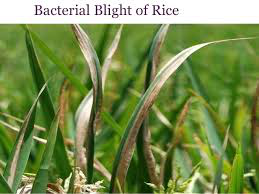

In [349]:
img


In [350]:
x=img_to_array(img)

In [351]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[ 54., 108.,  12.],
        [ 53., 109.,  12.],
        [ 52., 109.,  15.],
        ...,
        [ 10.,  60.,   0.],
        [ 26.,  76.,   7.],
        [ 39.,  89.,  20.]],

       [[ 66., 104.,  27.],
        [ 64., 102.,  25.],
        [ 61.,  99.,  22.],
        ...,
        [ 37.,  75.,  16.],
        [ 37.,  75.,  16.],
        [ 38.,  76.,  17.]],

       [[111., 149.,  72.],
        [109., 147.,  70.],
        [106., 1

In [352]:
x.shape

(194, 259, 3)

In [353]:
x=x.reshape((1,)+x.shape)

In [354]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[ 54., 108.,  12.],
         [ 53., 109.,  12.],
         [ 52., 109.,  15.],
         ...,
         [ 10.,  60.,   0.],
         [ 26.,  76.,   7.],
         [ 39.,  89.,  20.]],

        [[ 66., 104.,  27.],
         [ 64., 102.,  25.],
         [ 61.,  99.,  22.],
         ...,
         [ 37.,  75.,  16.],
         [ 37.,  75.,  16.],
         [ 38.,  76.,  17.]],

        [[111., 149.,  72.],
       

In [355]:
x.shape

(1, 194, 259, 3)

In [358]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
def funn():
    datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

    img = load_img(r'C:\Users\tvaru\Desktop\test1.jpeg')  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=r'D:\demo', save_prefix='cat', save_format='jpg'):
        i += 1
        if i > 20:
            break 
funn()

In [8]:
import keras

Using TensorFlow backend.


In [9]:
pwd

'C:\\Users\\tvaru\\Desktop\\Train-2019\\Train'

In [17]:


help(tf.contrib.lite.TFLiteConverter)


Help on class TFLiteConverter in module tensorflow.contrib.lite.python.lite:

class TFLiteConverter(builtins.object)
 |  Convert a TensorFlow model into `output_format` using TOCO.
 |  
 |  This is used to convert from a TensorFlow GraphDef or SavedModel into either a
 |  TFLite FlatBuffer or graph visualization.
 |  
 |  Attributes:
 |  
 |    inference_type: Target data type of real-number arrays in the output file.
 |      Must be `{FLOAT, QUANTIZED_UINT8}`.  (default FLOAT)
 |    inference_input_type: Target data type of real-number input arrays. Allows
 |      for a different type for input arrays in the case of quantization.
 |      Must be `{FLOAT, QUANTIZED_UINT8}`. (default `inference_type`)
 |    output_format: Output file format. Currently must be `{TFLITE,
 |      GRAPHVIZ_DOT}`. (default TFLITE)
 |    quantized_input_stats: Dict of strings representing input tensor names
 |      mapped to tuple of floats representing the mean and standard deviation
 |      of the training 

In [15]:
import tensorflow as tf